# Attempt 1

In [9]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
from tabulate import tabulate
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

In [10]:
df = pd.read_csv('/content/combined_data.csv')

In [3]:
df.head()

,file_name,report_id,drug_identification_number,brand_name,company_name,common_or_proper_name,ingredients,strength_s,packaging_size,actual_start_date,actual_end_date
0,2017_Canada_Shortage.xlsx,28240,1963937.0,0.9% SODIUM CHLORIDE IRRIGATION USP,B. BRAUN MEDICAL INC,Sodium Chloride,SODIUM CHLORIDE,8.9999999999999993E-3,"500mL, 1000mL, 2000mL, 4000mL",2017-11-03T00:00:00Z,NaN
1,2017_Canada_Shortage.xlsx,24792,2141450.0,20% PROSOL,BAXTER CORPORATION,20% PROSOL,PHENYLALANINE\r HISTIDINE\r TRYPTOPHAN\r LEUCI...,1G\r 1.18G\r 0.32G\r 1.08G\r 1.96G\r 0.98G\r 2...,2000 mL,2017-11-15T00:00:00Z,2017-11-21T00:00:00Z
2,2017_Canada_Shortage.xlsx,27274,2248489.0,"4% ASTRACAINE DENTAL WITH EPINEPHRINE 1:200,00...",DENTSPLY CANADA LIMITED,Articaine Hydrochloride 40 mg/mL and Epinephri...,ARTICAINE HYDROCHLORIDE\r EPINEPHRINE,40MG\r 0.005MG,100 1.8 mL cartridges/box,2018-03-01T00:00:00Z,2018-03-29T00:00:00Z
3,2017_Canada_Shortage.xlsx,26870,2299135.0,40 (MEQ)MMOL/L POTASSIUM CHLORIDE PLUS 5% DEXT...,HOSPIRA HEALTHCARE CORPORATION,Potassium Chloride in 5% Dextrose and 0.9% Sod...,DEXTROSE\r POTASSIUM CHLORIDE\r SODIUM CHLORIDE,5.0G\r 0.3G\r 0.9G,1000ML,NaN,2017-11-30T00:00:00Z
4,2017_Canada_Shortage.xlsx,30198,37974.0,50% DEXTROSE INJECTION USP,HOSPIRA HEALTHCARE CORPORATION,50% DEXTROSE,DEXTROSE,500MG,25x50mL GVL,2018-01-19T00:00:00Z,2018-03-02T00:00:00Z


In [11]:
df.dtypes

file_name                      object
report_id                       int64
drug_identification_number    float64
brand_name                     object
company_name                   object
common_or_proper_name          object
ingredients                    object
strength_s                     object
packaging_size                 object
actual_start_date              object
actual_end_date                object
dtype: object

In [12]:
df['actual_start_date'] = df['actual_start_date'].astype('datetime64[D]')

In [13]:
df['actual_end_date'] = df['actual_end_date'].astype('datetime64[D]')

In [14]:
df['drug_identification_number'] = df['drug_identification_number'].fillna(0)
df['drug_identification_number'] = df['drug_identification_number'].astype('int')

In [15]:
df.dtypes

file_name                             object
report_id                              int64
drug_identification_number             int64
brand_name                            object
company_name                          object
common_or_proper_name                 object
ingredients                           object
strength_s                            object
packaging_size                        object
actual_start_date             datetime64[ns]
actual_end_date               datetime64[ns]
dtype: object

In [16]:
df.dropna(inplace=True)

In [17]:
df=df.drop_duplicates("report_id", keep=False)

In [18]:
df['Days']= df['actual_end_date'] - df['actual_start_date']

In [19]:
df['Days2'] = df['Days'].dt.days
df['Days2']=df['Days2'].astype('int')

In [20]:
df['file_name'] = df['file_name'].str[0:4]

In [21]:
df.to_csv("data.csv", index=False)

In [22]:
din = df['drug_identification_number'].mode()
din

0    717002
Name: drug_identification_number, dtype: int64

In [23]:
col_list = ['actual_start_date', 'Days2']
df2 = df[col_list]
df2 = df2.loc[(df['actual_start_date'] >= '2017-01-01')]

In [24]:
df2.head()

,actual_start_date,Days2
1,2017-11-15,6
2,2018-03-01,28
4,2018-01-19,42
6,2017-11-17,122
8,2017-09-13,428


In [25]:
df2['actual_start_date'] = df2['actual_start_date'].astype('datetime64[D]')

In [26]:
df2.dtypes

actual_start_date    datetime64[ns]
Days2                         int64
dtype: object

In [27]:
df2=df2.dropna(subset=['actual_start_date','Days2'] )

In [28]:
df2.set_index('actual_start_date', inplace=True)

In [29]:
result = adfuller(df2['Days2'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.697861
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [30]:
# If the time series is not stationary, apply differencing to make it stationary
if result[1] > 0.05:
    diff = df2['Days2'].diff().dropna()
else:
    diff = df2['Days2']

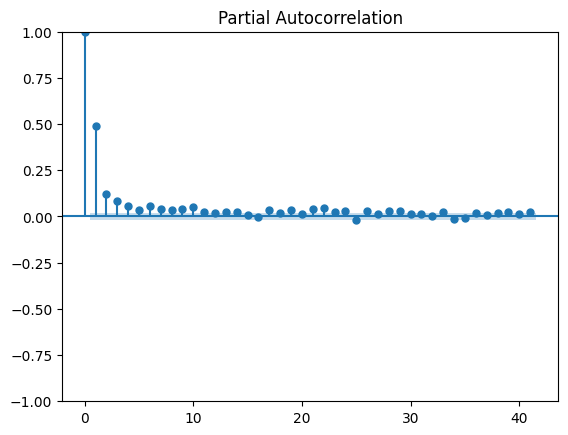

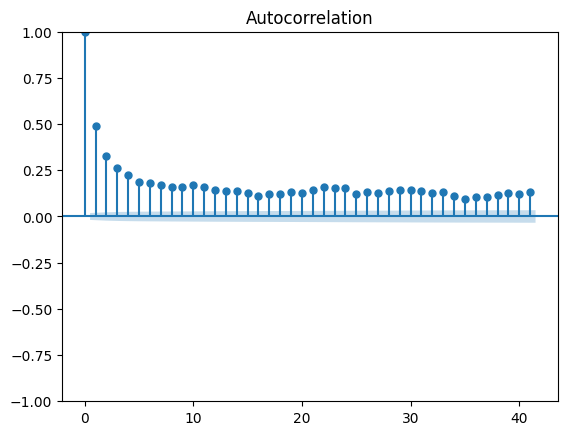

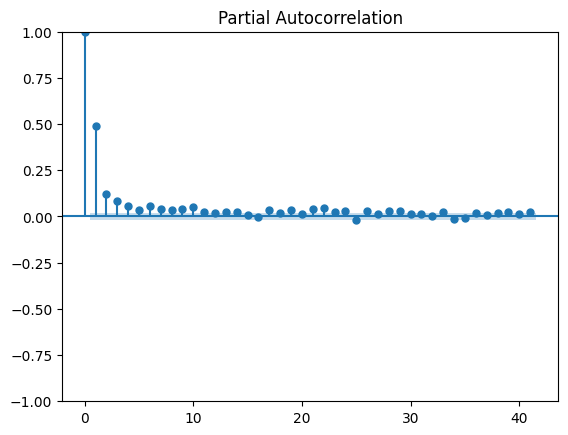

In [31]:
plot_acf(diff)
plot_pacf(diff)

In [32]:
p = 1
d = 1
q = 1

In [33]:
train_size = int(len(diff) * .8)
train, test = diff[:train_size], diff[train_size:]

In [34]:
model = ARIMA(train, order=(p,d,q))
model_fit = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels

In [35]:
predictions = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [36]:
predictions.shape

(2210,)

In [37]:
mse = mean_squared_error(test, predictions)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

Mean Squared Error (MSE): 4726.88


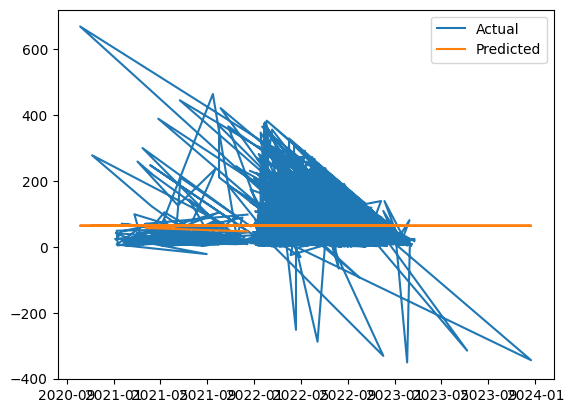

In [39]:
# Plot the actual vs predicted values
plt.plot(diff.index[train_size:], test, label='Actual')
plt.plot(diff.index[train_size:], predictions, label='Predicted')
plt.legend()
plt.show()

# Attempt 2

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [90]:
# Load data into a pandas dataframe
df = pd.read_csv('/content/combined_data.csv', parse_dates=True)

In [91]:
df.head()

,file_name,report_id,drug_identification_number,brand_name,company_name,common_or_proper_name,ingredients,strength_s,packaging_size,actual_start_date,actual_end_date
0,2017_Canada_Shortage.xlsx,28240,1963937.0,0.9% SODIUM CHLORIDE IRRIGATION USP,B. BRAUN MEDICAL INC,Sodium Chloride,SODIUM CHLORIDE,8.9999999999999993E-3,"500mL, 1000mL, 2000mL, 4000mL",2017-11-03T00:00:00Z,NaN
1,2017_Canada_Shortage.xlsx,24792,2141450.0,20% PROSOL,BAXTER CORPORATION,20% PROSOL,PHENYLALANINE\r HISTIDINE\r TRYPTOPHAN\r LEUCI...,1G\r 1.18G\r 0.32G\r 1.08G\r 1.96G\r 0.98G\r 2...,2000 mL,2017-11-15T00:00:00Z,2017-11-21T00:00:00Z
2,2017_Canada_Shortage.xlsx,27274,2248489.0,"4% ASTRACAINE DENTAL WITH EPINEPHRINE 1:200,00...",DENTSPLY CANADA LIMITED,Articaine Hydrochloride 40 mg/mL and Epinephri...,ARTICAINE HYDROCHLORIDE\r EPINEPHRINE,40MG\r 0.005MG,100 1.8 mL cartridges/box,2018-03-01T00:00:00Z,2018-03-29T00:00:00Z
3,2017_Canada_Shortage.xlsx,26870,2299135.0,40 (MEQ)MMOL/L POTASSIUM CHLORIDE PLUS 5% DEXT...,HOSPIRA HEALTHCARE CORPORATION,Potassium Chloride in 5% Dextrose and 0.9% Sod...,DEXTROSE\r POTASSIUM CHLORIDE\r SODIUM CHLORIDE,5.0G\r 0.3G\r 0.9G,1000ML,NaN,2017-11-30T00:00:00Z
4,2017_Canada_Shortage.xlsx,30198,37974.0,50% DEXTROSE INJECTION USP,HOSPIRA HEALTHCARE CORPORATION,50% DEXTROSE,DEXTROSE,500MG,25x50mL GVL,2018-01-19T00:00:00Z,2018-03-02T00:00:00Z


In [92]:
df.dropna(subset=['actual_start_date', 'actual_end_date'], inplace=True)

In [93]:
df = df.drop_duplicates("report_id", keep=False)

In [94]:
df['actual_start_date'] = df['actual_start_date'].astype('datetime64[D]')
df['actual_end_date'] = df['actual_end_date'].astype('datetime64[D]')

In [95]:
df['drug_identification_number'] = df['drug_identification_number'].fillna(0)
df['drug_identification_number'] = df['drug_identification_number'].astype('int')

In [96]:
df['Days'] = df['actual_end_date'] - df['actual_start_date']

In [97]:
df['Days2'] = df['Days'].dt.days
df['Days2']=df['Days2'].astype('int')

In [98]:
df['file_name'] = df['file_name'].str[0:4]

In [99]:
din = df['drug_identification_number'].mode()
din

0    717002
Name: drug_identification_number, dtype: int64

In [100]:
df.head()

,file_name,report_id,drug_identification_number,brand_name,company_name,common_or_proper_name,ingredients,strength_s,packaging_size,actual_start_date,actual_end_date,Days,Days2
1,2017,24792,2141450,20% PROSOL,BAXTER CORPORATION,20% PROSOL,PHENYLALANINE\r HISTIDINE\r TRYPTOPHAN\r LEUCI...,1G\r 1.18G\r 0.32G\r 1.08G\r 1.96G\r 0.98G\r 2...,2000 mL,2017-11-15,2017-11-21,6 days,6
2,2017,27274,2248489,"4% ASTRACAINE DENTAL WITH EPINEPHRINE 1:200,00...",DENTSPLY CANADA LIMITED,Articaine Hydrochloride 40 mg/mL and Epinephri...,ARTICAINE HYDROCHLORIDE\r EPINEPHRINE,40MG\r 0.005MG,100 1.8 mL cartridges/box,2018-03-01,2018-03-29,28 days,28
4,2017,30198,37974,50% DEXTROSE INJECTION USP,HOSPIRA HEALTHCARE CORPORATION,50% DEXTROSE,DEXTROSE,500MG,25x50mL GVL,2018-01-19,2018-03-02,42 days,42
5,2017,10415,2364182,ABSTRAL,PALADIN LABS INC,FENTANYL,FENTANYL,200MCG,10 Tabs,2015-11-27,2015-11-27,0 days,0
6,2017,29649,2303450,ACCEL PIOGLITAZONE,ACCEL PHARMA INC,ACCEL PIOGLITAZONE,PIOGLITAZONE,30MG,100 tablets,2017-11-17,2018-03-19,122 days,122


In [101]:
df_trainable = df.copy()

In [102]:
df_trainable = df_trainable[['actual_start_date', 'Days2']]

In [103]:
df_trainable.set_index('actual_start_date', inplace=True)

In [105]:
df_trainable.sort_index(inplace=True)

In [106]:
# Split data into training and testing sets
train_data = df_trainable[df_trainable.index < '2022-01-01']['Days2']
test_data = df_trainable[df_trainable.index >= '2022-01-01']['Days2']

In [107]:
train_data.head()

actual_start_date
2002-01-01    5685
2012-03-23    2931
2012-03-23    2931
2013-03-01    1496
2013-05-14    1774
Name: Days2, dtype: int64

In [108]:
# Train ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
fitted_model = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [109]:
# Make predictions on test data
predicted_values = fitted_model.predict()

In [110]:
predicted_values

actual_start_date
2002-01-01       0.000000
2012-03-23    5531.661916
2012-03-23    4033.423667
2013-03-01    3700.789301
2013-05-14    2973.963500
                 ...     
2021-12-30      77.478846
2021-12-31      46.130471
2021-12-31      46.825486
2021-12-31      45.969577
2021-12-31      89.698315
Name: predicted_mean, Length: 9290, dtype: float64

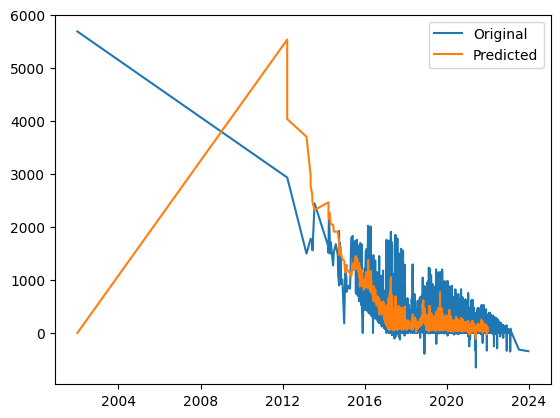

In [112]:
# Plot original data and predicted values
plt.plot(df_trainable.index, df_trainable['Days2'], label='Original')
plt.plot(predicted_values.index, predicted_values, label='Predicted')
plt.legend()
plt.show()

# Attempt 2 - Continuation

In [115]:
name_groups = df.groupby('common_or_proper_name')

In [119]:
name_groups['Days2'].mean()

common_or_proper_name
% 5 Dextrose Injection USP                                                                       125.000000
(hepatitis B vaccine [recombinant])                                                              769.750000
(measles, mumps and rubella virus vaccine, live, attenuated) Lyophilized powder for injection     25.400000
(mirtazapine) Orally Disintegrating Tablets                                                       37.666667
(mirtazapine) Tablets                                                                              4.000000
                                                                                                    ...    
ursodiol                                                                                          19.000000
vancomycin hydrochloride                                                                          47.000000
verteporfin                                                                                      522.000000
viacor

In [122]:
df_drug_hepatitis = df[df.common_or_proper_name == '(hepatitis B vaccine [recombinant])']

In [123]:
df_drug_hepatitis.head()

,file_name,report_id,drug_identification_number,brand_name,company_name,common_or_proper_name,ingredients,strength_s,packaging_size,actual_start_date,actual_end_date,Days,Days2
2989,2017,18922,2245977,RECOMBIVAX HB -(ADULT DIALYSIS-PRESERVATIV...,MERCK CANADA INC,(hepatitis B vaccine [recombinant]),HEPATITIS B SURFACE ANTIGEN,40MCG,40MCG/1ML 1DOSE VIAL,2017-10-03,2017-10-06,3 days,3
2990,2017,873,2243676,RECOMBIVAX HB -(PRESERVATIVE FREE),MERCK CANADA INC,(hepatitis B vaccine [recombinant]),HEPATITIS B SURFACE ANTIGEN,10MCG,10MCG/1ML 10X1DOSE VIAL,2017-08-04,2022-06-22,1783 days,1783
2991,2017,15524,2243676,RECOMBIVAX HB -(PRESERVATIVE FREE),MERCK CANADA INC,(hepatitis B vaccine [recombinant]),HEPATITIS B SURFACE ANTIGEN,10MCG,5MCG/0.5ML 1DOSE VIAL (Ped),2017-08-02,2017-08-24,22 days,22
2992,2017,23503,2243676,RECOMBIVAX HB -(PRESERVATIVE FREE),MERCK CANADA INC,(hepatitis B vaccine [recombinant]),HEPATITIS B SURFACE ANTIGEN,10MCG,10MCG/1ML 1DOSE VIAL,2017-09-21,2021-03-15,1271 days,1271


In [126]:
df_trainable = df_drug_hepatitis.copy()

In [127]:
df_trainable = df_trainable[['actual_start_date', 'Days2']]

In [128]:
df_trainable.set_index('actual_start_date', inplace=True)

In [129]:
df_trainable.sort_index(inplace=True)

In [130]:
# Split data into training and testing sets
train_data = df_trainable[df_trainable.index < '2022-01-01']['Days2']
test_data = df_trainable[df_trainable.index >= '2022-01-01']['Days2']

In [131]:
# Train ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
fitted_model = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [132]:
# Make predictions on test data
predicted_values = fitted_model.predict()

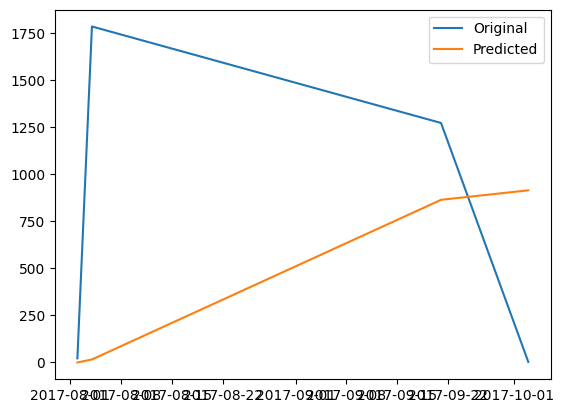

In [133]:
# Plot original data and predicted values
plt.plot(df_trainable.index, df_trainable['Days2'], label='Original')
plt.plot(predicted_values.index, predicted_values, label='Predicted')
plt.legend()
plt.show()